# Sentiment Analysis of twitter tweets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
from nltk.classify.scikitlearn import SklearnClassifier
import random
import pickle

In [3]:
df = pd.read_csv('../datasets/Tweets.csv') #https://www.kaggle.com/sbhatti/financial-sentiment-analysis
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


## Understanding the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

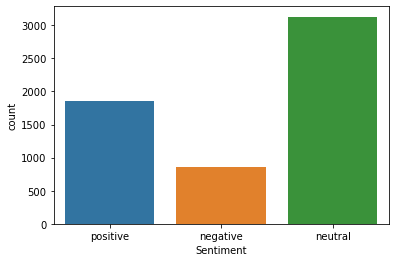

In [5]:
sns.countplot(data=df, x='Sentiment')

This shows we have 3 labels - Positive, negative and netural with maximum of neutral tweets.

## Basic NLTK to start building the model

In [6]:
documents = []
for ind in df.index:
    words = nltk.word_tokenize(df['Sentence'][ind])
    documents.append((words, df['Sentiment'][ind]))

In [7]:
all_words = []
for sentence in df['Sentence'].tolist():
    all_words += nltk.word_tokenize(sentence)

In [8]:
all_words = nltk.FreqDist(all_words)
all_words.most_common(20)

[('.', 5149),
 ('the', 4788),
 (',', 4782),
 ('of', 3312),
 ('in', 2900),
 ('to', 2755),
 ('and', 2492),
 ('a', 1769),
 ('$', 1321),
 ('The', 1309),
 ('for', 1283),
 ('EUR', 1189),
 ("'s", 1069),
 ('from', 944),
 ('is', 899),
 ('will', 800),
 ('on', 788),
 ('company', 762),
 ('mn', 729),
 (':', 720)]

In [9]:
len(all_words)

14887

In [10]:
word_features = list(all_words.keys())[:3000]

In [11]:
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
         features[w] = (w in words)
    return features

In [12]:
featuresets = [(find_features(tweet), category) for (tweet, category) in documents]

In [13]:
total_len = len(featuresets)
print("Total Length:", total_len)
print("80% of the data is:", int(total_len*0.8))

Total Length: 5842
80% of the data is: 4673


In [14]:
training_set = featuresets[:4673]
testing_set = featuresets[4673:]

## Model testing

NLTK builtin naive bayes calssifier

In [15]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [16]:
print("Original Naive Bayes Algo accuracy percent: ", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

Original Naive Bayes Algo accuracy percent:  68.60564585115483
Most Informative Features
                    TSLA = True           negati : neutra =     58.3 : 1.0
                   lower = True           negati : positi =     54.8 : 1.0
                       X = True           negati : neutra =     41.0 : 1.0
                   https = True           negati : neutra =     36.7 : 1.0
                    grew = True           positi : neutra =     34.5 : 1.0
                    http = True           positi : neutra =     30.0 : 1.0
                    fell = True           negati : positi =     29.4 : 1.0
                       @ = True           negati : neutra =     29.3 : 1.0
                positive = True           positi : neutra =     27.7 : 1.0
                    AAPL = True           negati : neutra =     27.6 : 1.0
                    rose = True           positi : neutra =     26.6 : 1.0
                    down = True           negati : positi =     26.5 : 1.0
           

In [18]:
save_classifier = open("../models/naivebayes.pickle", "wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

In [15]:
# Loading the classifier
classifier_f = open("../models/naivebayes.pickle", 'rb')
classifier_orig = pickle.load(classifier_f)
classifier_f.close()

In [17]:
print("Loaded Naive Bayes Algo accuracy percent: ", (nltk.classify.accuracy(classifier_orig, testing_set))*100)
classifier_orig.show_most_informative_features(15)

Loaded Naive Bayes Algo accuracy percent:  68.60564585115483
Most Informative Features
                    TSLA = True           negati : neutra =     58.3 : 1.0
                   lower = True           negati : positi =     54.8 : 1.0
                       X = True           negati : neutra =     41.0 : 1.0
                   https = True           negati : neutra =     36.7 : 1.0
                    grew = True           positi : neutra =     34.5 : 1.0
                    http = True           positi : neutra =     30.0 : 1.0
                    fell = True           negati : positi =     29.4 : 1.0
                       @ = True           negati : neutra =     29.3 : 1.0
                positive = True           positi : neutra =     27.7 : 1.0
                    AAPL = True           negati : neutra =     27.6 : 1.0
                    rose = True           positi : neutra =     26.6 : 1.0
                    down = True           negati : positi =     26.5 : 1.0
             

In [18]:
classifier_orig.classify(find_features('An EU proposal that would have banned the mining of energy-intensive cryptocurrencies such as Bitcoin failed in a committee vote, in what industry backers called a big win'))

'positive'

## Using Sklearn classifiers

In [19]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [39]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC

Multinominal Naive Bayes

In [21]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)

<SklearnClassifier(MultinomialNB())>

In [22]:
print("MNB_classifier accuracy percent: ", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)

MNB_classifier accuracy percent:  69.20444824636441


In [23]:
save_classifier = open("../models/mnb_classifier.pickle", "wb")
pickle.dump(MNB_classifier, save_classifier)
save_classifier.close()

Bernoulli Naive Bayes

In [24]:
BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)

<SklearnClassifier(BernoulliNB())>

In [25]:
print("BernoulliNB_classifier accuracy percent: ", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

BernoulliNB_classifier accuracy percent:  68.77673224978615


In [26]:
save_classifier = open("../models/bernoulliNB_classifier.pickle", "wb")
pickle.dump(BernoulliNB_classifier, save_classifier)
save_classifier.close()

Logistic Regression

In [27]:
LogisticRegression_classifier = SklearnClassifier(LogisticRegression(max_iter=1000))
LogisticRegression_classifier.train(training_set)

<SklearnClassifier(LogisticRegression(max_iter=1000))>

In [28]:
print("LogisticRegression_classifier accuracy percent: ", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

LogisticRegression_classifier accuracy percent:  68.69118905047048


In [29]:
save_classifier = open("../models/LogisticRegression_classifier.pickle", "wb")
pickle.dump(LogisticRegression_classifier, save_classifier)
save_classifier.close()

SVC

In [30]:
SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(training_set)

<SklearnClassifier(SVC())>

In [31]:
print("SVC_classifier accuracy percent: ", (nltk.classify.accuracy(SVC_classifier, testing_set))*100)

SVC_classifier accuracy percent:  69.803250641574


In [32]:
save_classifier = open("../models/SVC_classifier.pickle", "wb")
pickle.dump(SVC_classifier, save_classifier)
save_classifier.close()

LinearSVC

In [33]:
LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)

<SklearnClassifier(LinearSVC())>

In [34]:
print("LinearSVC_classifier accuracy percent: ", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

LinearSVC_classifier accuracy percent:  65.35500427715996


In [35]:
save_classifier = open("../models/LinearSVC_classifier.pickle", "wb")
pickle.dump(LinearSVC_classifier, save_classifier)
save_classifier.close()

SGDClassifier

In [40]:
SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)

<SklearnClassifier(SGDClassifier())>

In [41]:
print("SGDClassifier_classifier accuracy percent: ", (nltk.classify.accuracy(SGDClassifier_classifier, testing_set))*100)

SGDClassifier_classifier accuracy percent:  65.69717707442258


In [42]:
save_classifier = open("../models/SGDClassifier_classifier.pickle", "wb")
pickle.dump(LinearSVC_classifier, save_classifier)
save_classifier.close()

### Vote classifier

In [37]:
from nltk.classify import ClassifierI
from statistics import mode

In [38]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers
        
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)
    
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

In [55]:
voted_classifier = VoteClassifier(MNB_classifier, 
                                  BernoulliNB_classifier, 
                                  LogisticRegression_classifier,  
                                  LinearSVC_classifier, 
                                  SVC_classifier)

In [56]:
print("voted_classifier accuracy percent: ", (nltk.classify.accuracy(voted_classifier, testing_set))*100)

voted_classifier accuracy percent:  68.77673224978615


In [57]:
print("Classification:", voted_classifier.classify(testing_set[0][0]), 
      "Confidence percent:", voted_classifier.confidence(testing_set[0][0]))

Classification: neutral Confidence percent: 1.0


## Validating the model using random crypto tweets on twitter

In [58]:
validation_feature_set = find_features('An EU proposal that would have banned the mining of energy-intensive cryptocurrencies such as Bitcoin failed in a committee vote, in what industry backers called a big win')

In [59]:
print("Classification:", voted_classifier.classify(validation_feature_set),
      "Confidence percent:", voted_classifier.confidence(validation_feature_set))

Classification: positive Confidence percent: 0.6


In [60]:
validation2 = find_features('South Koreans have elected a pro-crypto president who vows to deregulate the #crypto industry. #cryptocurrency #bitcoin $BTC')

In [61]:
print("Classification:", voted_classifier.classify(validation2),
      "\nConfidence percent:", voted_classifier.confidence(validation2))

Classification: positive 
Confidence percent: 1.0
